In [73]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

# Data Preproscessing

In [19]:
#read dataset using pandas data frame
df = pd.read_csv('./diabetes_prediction_dataset.csv')

In [20]:
#print first 6 rows of dataset.
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [21]:
#print last 6 rows of dataset
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [22]:
#check number of rows and columns in the dataset
df.shape

(100000, 9)

This dataset contain 100000 rows and 9 columns.

In [23]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [24]:
#check number of duplicate values in the dataset.
df.duplicated().sum()

3854

It contain 3854 duplicate rows.Let's drop these rows.

In [25]:
#drop all duplicate values in the dataset.
df.drop_duplicates(inplace =True)

In [26]:
df.shape

(96146, 9)

Now it contain 96146 rows and 9 columns.

In [27]:
#check number of null values in the each row.
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Dataset doesn't contain any null values.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [29]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


# Data Vizualization

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64 



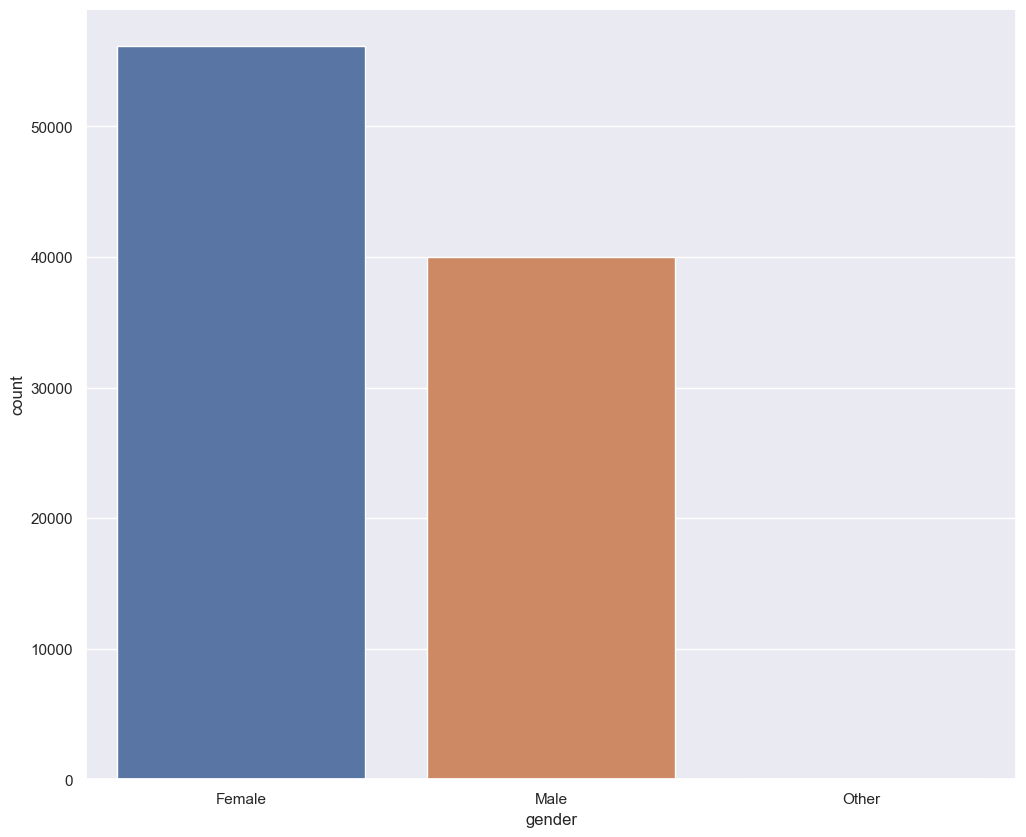

In [30]:
#gender column.
print(df['gender'].value_counts(),"\n")

sns.set()
plt.figure(figsize = (12, 10))
sns.countplot(x = 'gender', data = df)
plt.show()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64 



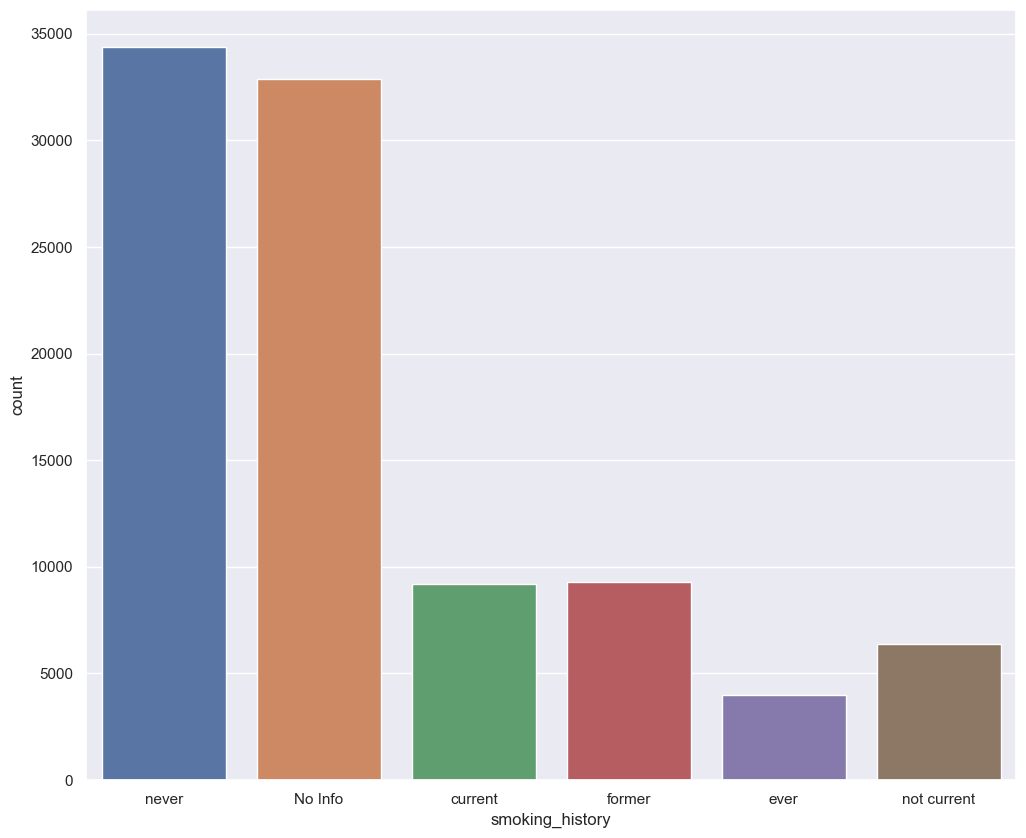

In [31]:
#smoking_history column.
print(df['smoking_history'].value_counts(),"\n")

sns.set()
plt.figure(figsize = (12, 10))
sns.countplot(x = 'smoking_history', data = df)
plt.show()

In [32]:
#Convert categorical variables
dummy1 = pd.get_dummies(df['gender'])
dummy2 = pd.get_dummies(df['smoking_history'])

In [33]:
df = pd.concat([df, dummy1, dummy2], axis = 1)
df.head(6)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,No Info,current,ever,former,never,not current
0,Female,80.0,0,1,never,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,Female,36.0,0,0,current,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0
5,Female,20.0,0,0,never,27.32,6.6,85,0,1,0,0,0,0,0,0,1,0


In [34]:
df.drop(columns = ['gender', 'smoking_history'], axis = 1, inplace = True)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,No Info,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


age columns.....


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


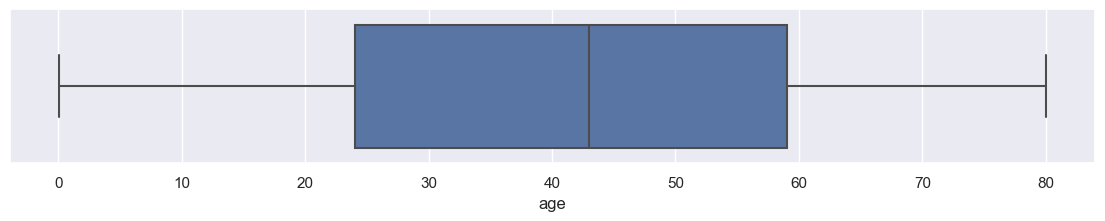



bmi columns.....


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


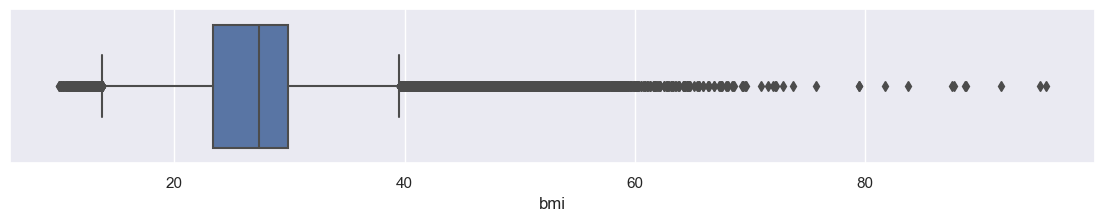



HbA1c_level columns.....


C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


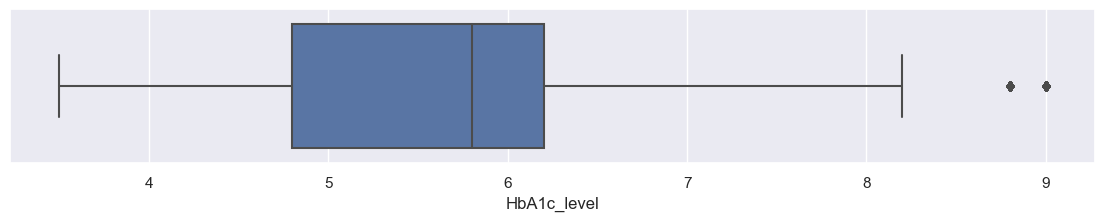

C:\Users\pinil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(




blood_glucose_level columns.....


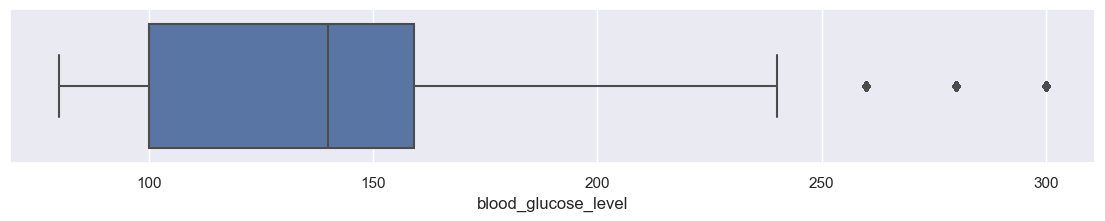

In [35]:
c = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']

for i in c:
    print(i, "columns.....")
    sns.set()
    plt.figure(figsize = (14, 2))
    sns.boxplot(df[i])
    plt.show()
    print("\n")

<Figure size 2000x2000 with 0 Axes>

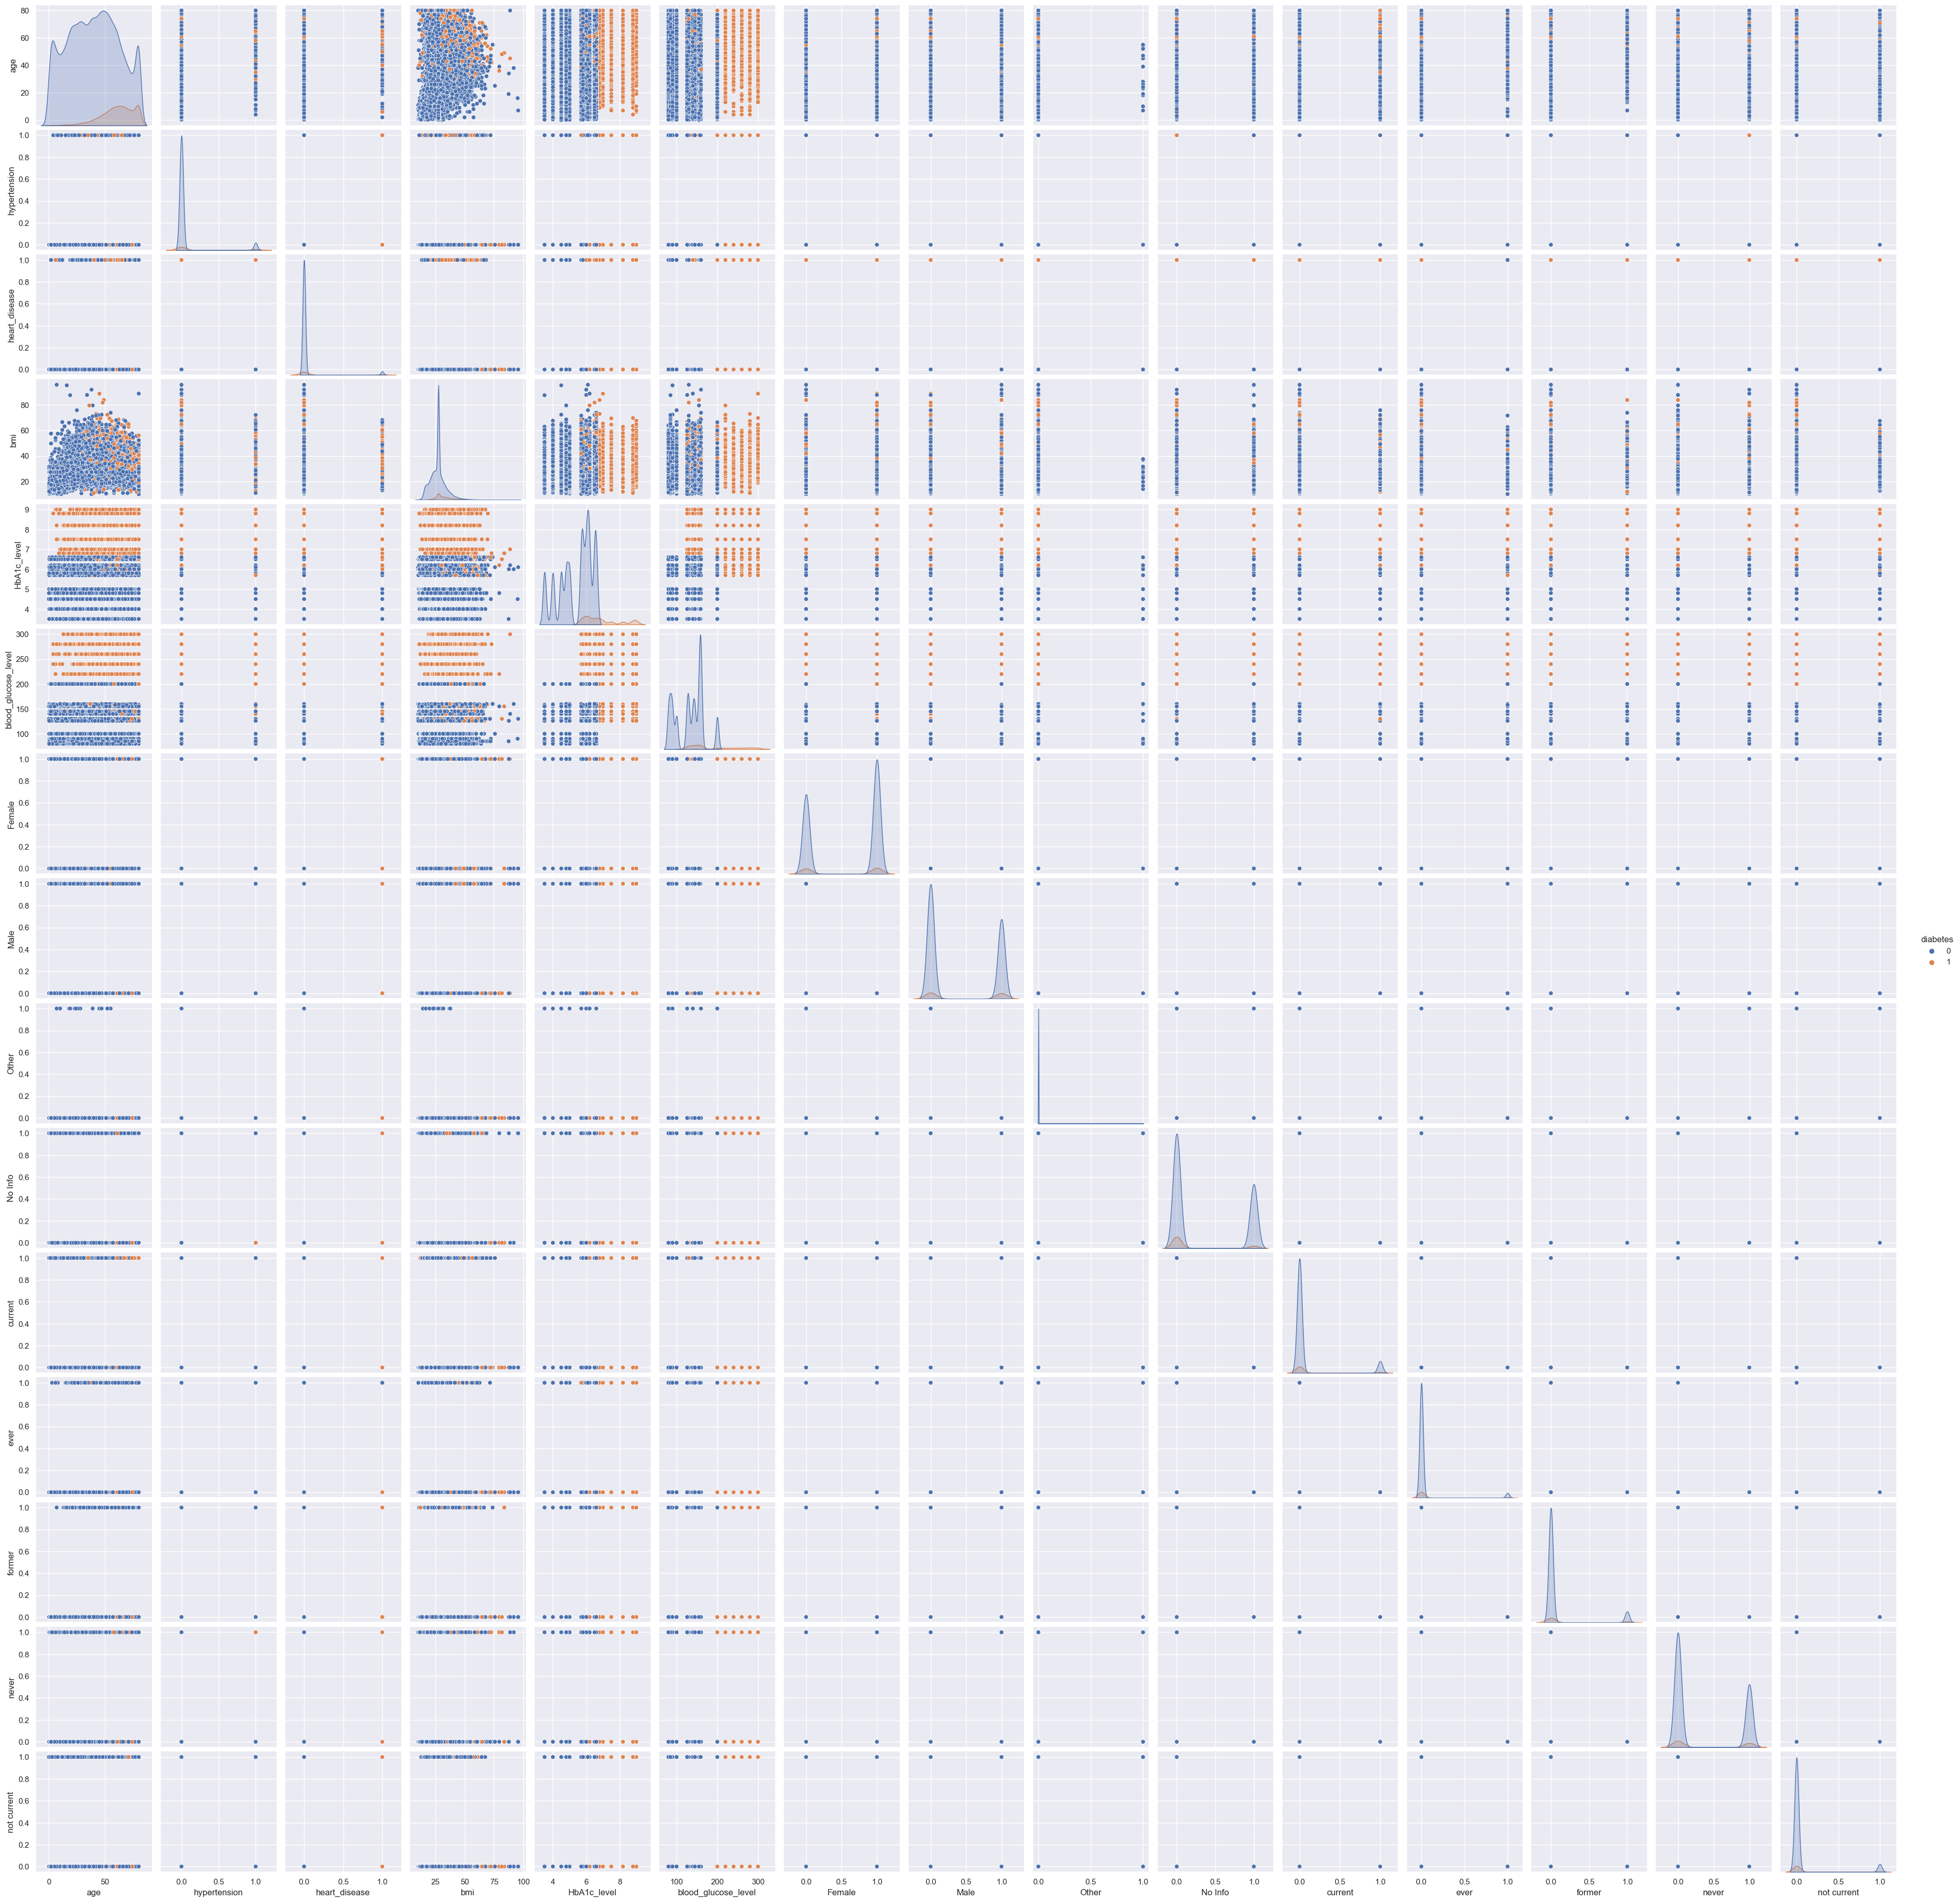

In [36]:
sns.set()
plt.figure(figsize = (20, 20))
sns.pairplot(df, hue = 'diabetes')
plt.show()

In [37]:
#chech correlated data
c = df.corr()
c

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,Other,No Info,current,ever,former,never,not current
age,1.000000,0.257305,0.238451,0.344797,0.106719,0.114317,0.264927,0.028785,-0.028580,-0.007456,-0.294166,0.033424,0.068179,0.221802,0.069213,0.069871
hypertension,0.257305,1.000000,0.119982,0.148111,0.081441,0.084834,0.195710,-0.014129,0.014240,-0.003969,-0.111535,0.015637,0.021178,0.080940,0.042553,-0.000951
heart_disease,0.238451,0.119982,1.000000,0.061376,0.068140,0.070832,0.170711,-0.078456,0.078539,-0.002822,-0.048194,0.006031,0.039469,0.093663,-0.033729,0.006810
bmi,0.344797,0.148111,0.061376,1.000000,0.084423,0.092543,0.214932,0.023484,-0.023488,0.000117,-0.229352,0.053933,0.044396,0.111806,0.088197,0.035208
HbA1c_level,0.106719,0.081441,0.068140,0.084423,1.000000,0.171615,0.406408,-0.019897,0.019944,-0.001620,-0.044146,0.005598,0.008715,0.036941,0.008967,0.009407
blood_glucose_level,0.114317,0.084834,0.070832,0.092543,0.171615,1.000000,0.424336,-0.017834,0.017824,0.000410,-0.049909,0.011962,0.005648,0.040361,0.010732,0.007870
diabetes,0.264927,0.195710,0.170711,0.214932,0.406408,0.424336,1.000000,-0.037763,0.037883,-0.004256,-0.112576,0.017037,0.021915,0.095492,0.023136,0.018921
Female,0.028785,-0.014129,-0.078456,0.023484,-0.019897,-0.017834,-0.037763,1.000000,-0.999615,-0.016217,-0.055204,-0.025913,-0.010499,-0.049174,0.098894,0.012211
Male,-0.028580,0.014240,0.078539,-0.023488,0.019944,0.017824,0.037883,-0.999615,1.000000,-0.011542,0.055215,0.026039,0.010473,0.049301,-0.098749,-0.012790
Other,-0.007456,-0.003969,-0.002822,0.000117,-0.001620,0.000410,-0.004256,-0.016217,-0.011542,1.000000,-0.000252,-0.004450,0.000958,-0.004478,-0.005455,0.020813


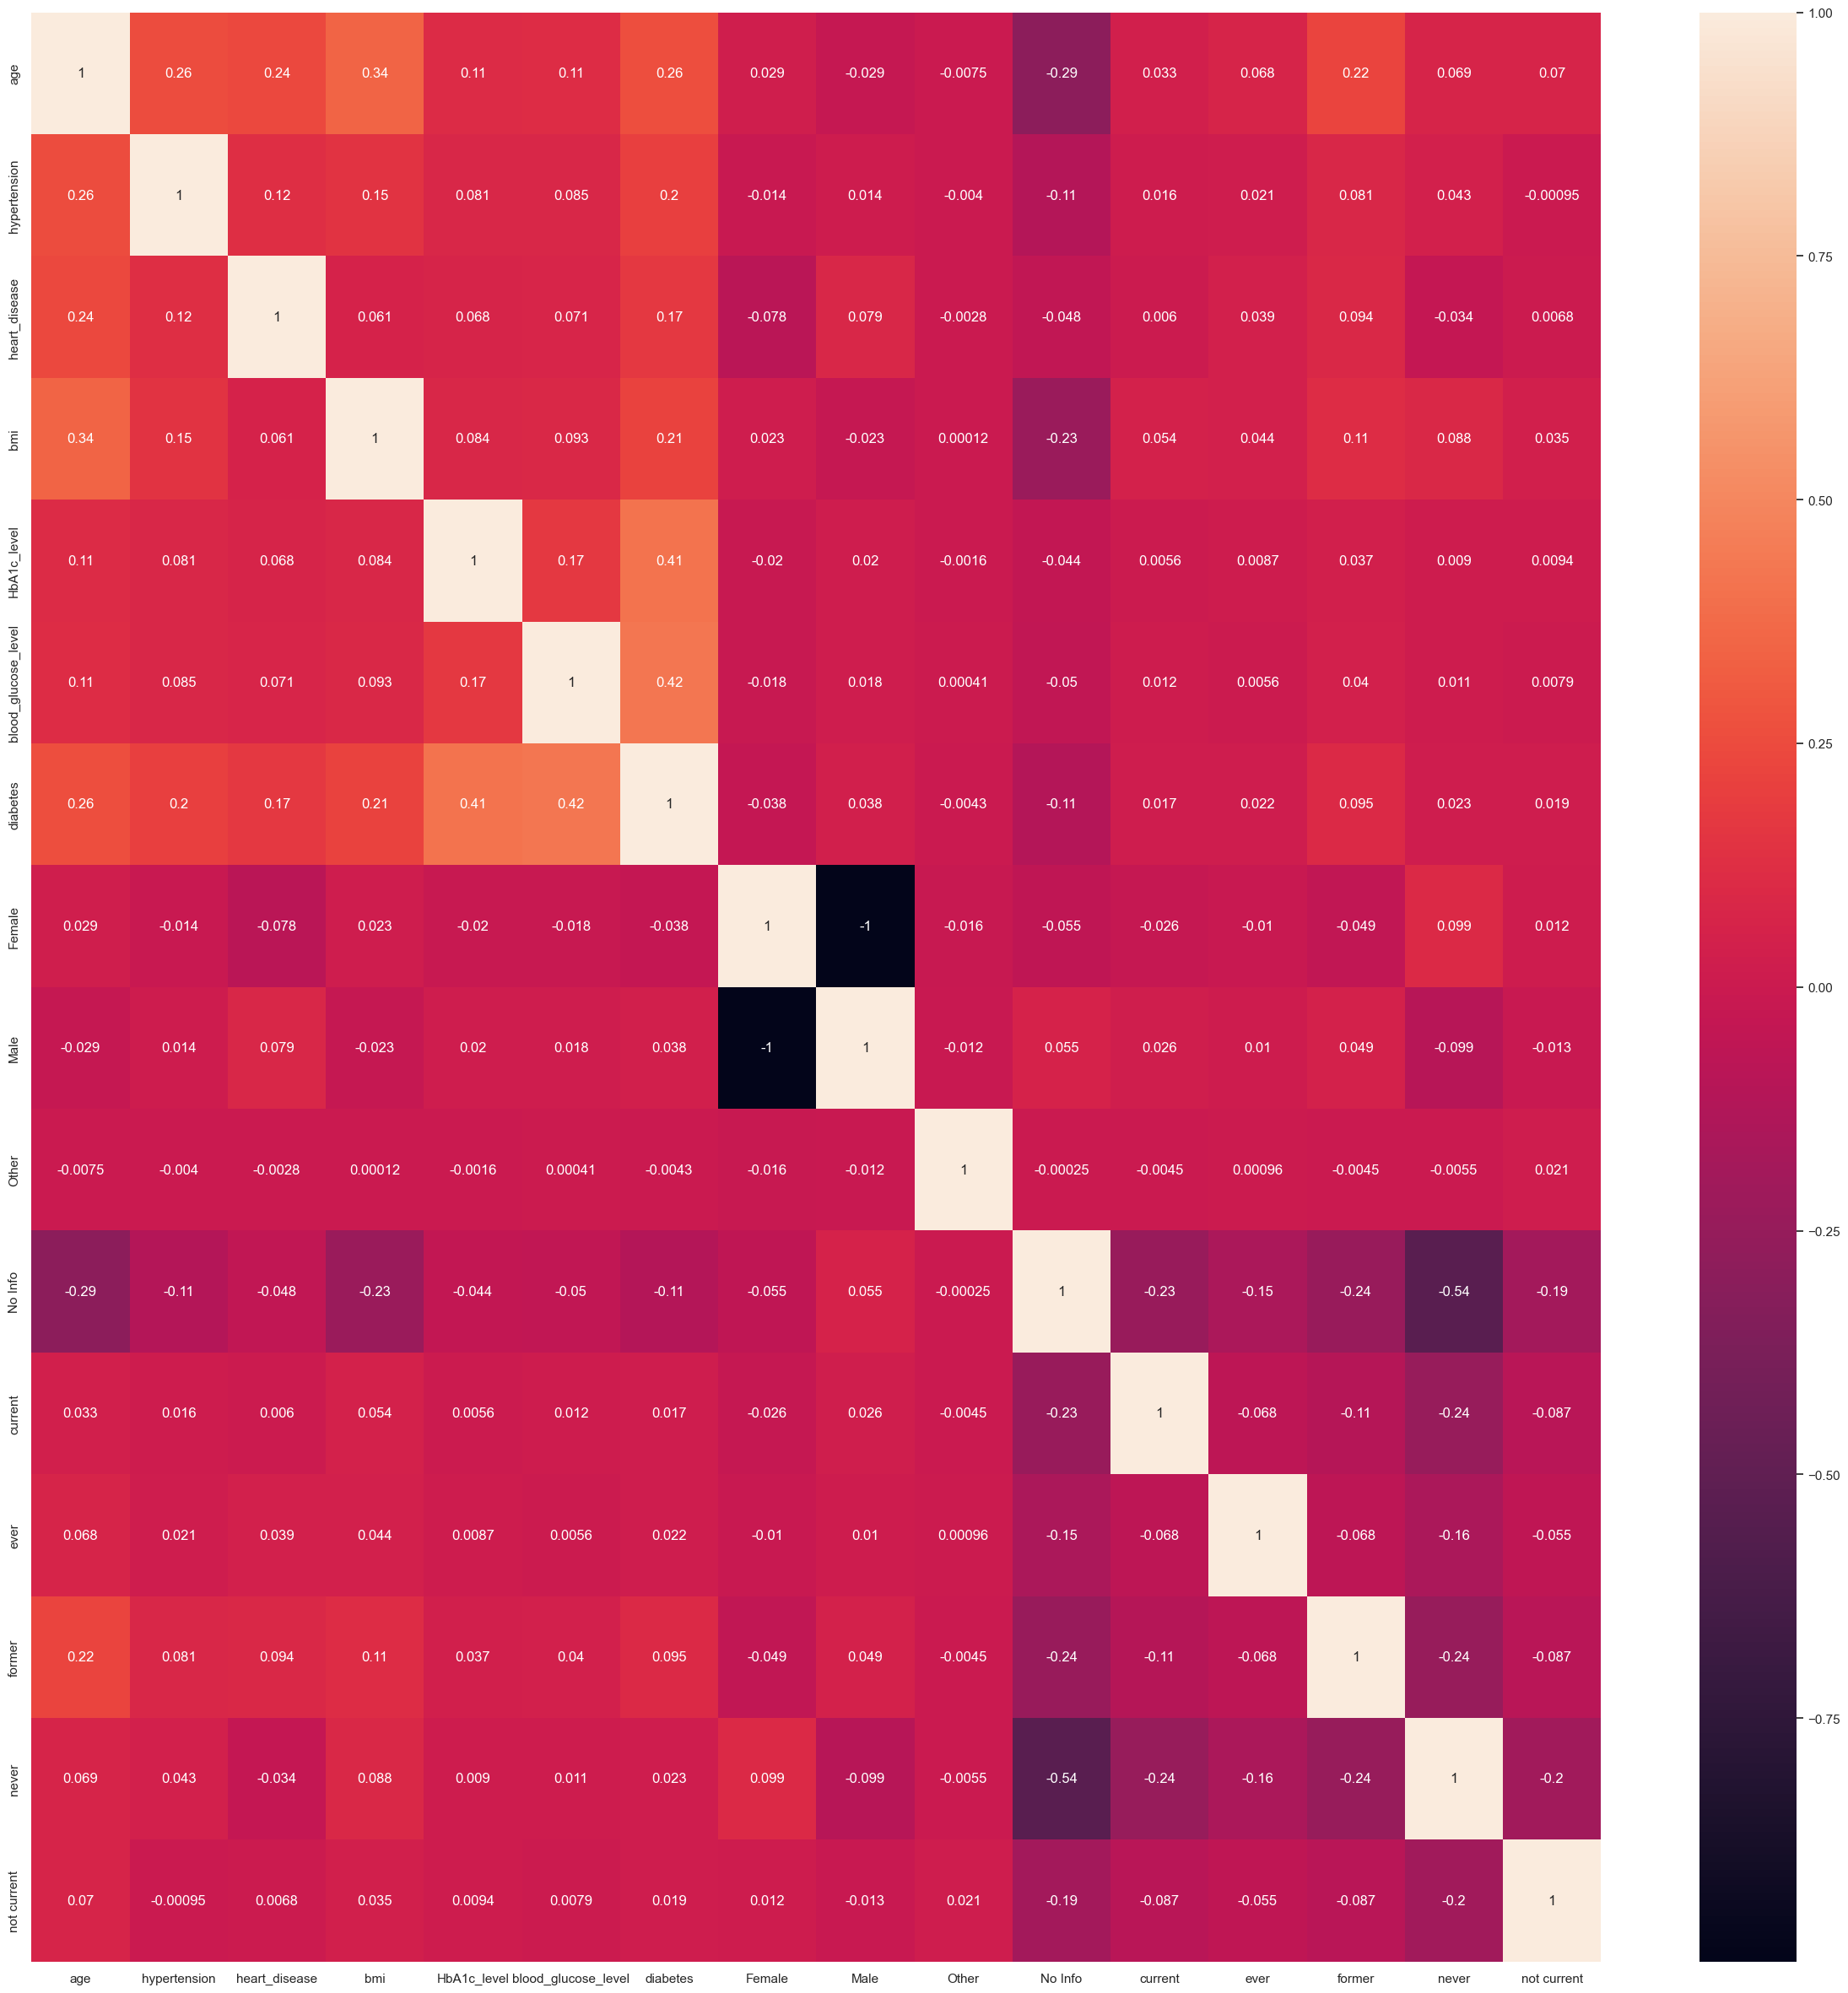

In [38]:
sns.set()
plt.figure(figsize = (30, 30))
sns.heatmap(c, annot = True)
plt.show()

In [48]:
#split data into targets and features.
x = df.drop(columns = 'diabetes', axis = 1)
y = df['diabetes']

In [49]:
print(x.shape)
print("x has 96146 rows and 15 columns. \n")
x.head()

(96146, 15)
x has 96146 rows and 15 columns. 



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Female,Male,Other,No Info,current,ever,former,never,not current
0,80.0,0,1,25.19,6.6,140,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,1,0,0,1,0,0,0,0


In [50]:
print(y.shape)
print("y has 96146 rows and 1 column. \n")
y.head()

(96146,)
y has 96146 rows and 1 column. 



0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [52]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 16)
print(x_train.columns)
print(x_test.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'Female', 'Male', 'Other', 'No Info', 'current',
       'ever', 'former', 'never', 'not current'],
      dtype='object')
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'Female', 'Male', 'Other', 'No Info', 'current',
       'ever', 'former', 'never', 'not current'],
      dtype='object')


In [53]:
print(x_train.shape)
print("x_train has 76916 rows and 15 columns.")
print(y_train.shape)
print("y_train has 76916 rows and 1 column.")
print(x_test.shape)
print("x_test has 19230 rows and 15 columns.")
print(y_test.shape)
print("y_test has 19230 rows and 1 column.")

(76916, 15)
x_train has 76916 rows and 15 columns.
(76916,)
y_train has 76916 rows and 1 column.
(19230, 15)
x_test has 19230 rows and 15 columns.
(19230,)
y_test has 19230 rows and 1 column.


In [54]:
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [56]:
#standardize data
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

x_train = pd.DataFrame(x_train, columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level','blood_glucose_level', 'Female', 'Male', 'Other', 'No Info', 'current','ever', 'former', 'never', 'not current'])
x_test = pd.DataFrame(x_test, columns = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level','blood_glucose_level', 'Female', 'Male', 'Other', 'No Info', 'current','ever', 'former', 'never', 'not current'])

print("standard deviation of x_train data :")
print(x_train.std())
print("")
print("-------------------------------------------------------------------------------------------------------------------------")
print("")
print("standard deviation of x_test data :")
print(x_test.std())

standard deviation of x_train data :
age                    1.000007
hypertension           1.000007
heart_disease          1.000007
bmi                    1.000007
HbA1c_level            1.000007
blood_glucose_level    1.000007
Female                 1.000007
Male                   1.000007
Other                  1.000007
No Info                1.000007
current                1.000007
ever                   1.000007
former                 1.000007
never                  1.000007
not current            1.000007
dtype: float64

-------------------------------------------------------------------------------------------------------------------------

standard deviation of x_test data :
age                    1.000026
hypertension           1.000026
heart_disease          1.000026
bmi                    1.000026
HbA1c_level            1.000026
blood_glucose_level    1.000026
Female                 1.000026
Male                   1.000026
Other                  1.000026
No Info             

# Model Building

In [57]:
#LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [59]:
lr_train_data_pre = lr.predict(x_train)
lr_test_data_pre = lr.predict(x_test)

lr_train_data_acc = accuracy_score(y_train, lr_train_data_pre)
lr_test_data_acc = accuracy_score(y_test, lr_test_data_pre)

print("Accuracy score for train data using Logistic Regression : ", lr_train_data_acc)
print("Accuracy score for test data using Logistic Regression : ", lr_test_data_acc)

Accuracy score for train data using Logistic Regression :  0.9588382131156067
Accuracy score for test data using Logistic Regression :  0.9592303692147686


In [66]:
#K-Neighbors Classifier
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_train_data_pre = knn.predict(x_train)
    knn_test_data_pre = knn.predict(x_test)

    knn_train_data_acc = accuracy_score(y_train, knn_train_data_pre)
    knn_test_data_acc = accuracy_score(y_test, knn_test_data_pre)
    print("n_neighbors = ", i)
    print("Accuracy score for train data using K-Neighbors Classifier : ", knn_train_data_acc)
    print("Accuracy score for test data using K-Neighbors Classifier : ", knn_test_data_acc)

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  1
Accuracy score for train data using K-Neighbors Classifier :  0.9993499401944979
Accuracy score for test data using K-Neighbors Classifier :  0.9463858554342174


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  2
Accuracy score for train data using K-Neighbors Classifier :  0.971280357792917
Accuracy score for test data using K-Neighbors Classifier :  0.9601664066562663


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  3
Accuracy score for train data using K-Neighbors Classifier :  0.9727754953455718
Accuracy score for test data using K-Neighbors Classifier :  0.9564222568902756


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  4
Accuracy score for train data using K-Neighbors Classifier :  0.9670159654688232
Accuracy score for test data using K-Neighbors Classifier :  0.960114404576183


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  5
Accuracy score for train data using K-Neighbors Classifier :  0.9682380779031671
Accuracy score for test data using K-Neighbors Classifier :  0.9592823712948518


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  6
Accuracy score for train data using K-Neighbors Classifier :  0.9645847417962452
Accuracy score for test data using K-Neighbors Classifier :  0.9597503900156006


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  7
Accuracy score for train data using K-Neighbors Classifier :  0.9657938530344792
Accuracy score for test data using K-Neighbors Classifier :  0.9599583983359334


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  8
Accuracy score for train data using K-Neighbors Classifier :  0.9634796401268917
Accuracy score for test data using K-Neighbors Classifier :  0.960634425377015


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  9
Accuracy score for train data using K-Neighbors Classifier :  0.9643897238545946
Accuracy score for test data using K-Neighbors Classifier :  0.9607384295371815


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  10
Accuracy score for train data using K-Neighbors Classifier :  0.962647563575849
Accuracy score for test data using K-Neighbors Classifier :  0.9606864274570983


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  11
Accuracy score for train data using K-Neighbors Classifier :  0.9634276353424515
Accuracy score for test data using K-Neighbors Classifier :  0.9609984399375975


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  12
Accuracy score for train data using K-Neighbors Classifier :  0.961711477455926
Accuracy score for test data using K-Neighbors Classifier :  0.9608424336973479


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  13
Accuracy score for train data using K-Neighbors Classifier :  0.9624915492225284
Accuracy score for test data using K-Neighbors Classifier :  0.9605824232969319


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  14
Accuracy score for train data using K-Neighbors Classifier :  0.9612564355920745
Accuracy score for test data using K-Neighbors Classifier :  0.9604784191367655


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  15
Accuracy score for train data using K-Neighbors Classifier :  0.9618024858286962
Accuracy score for test data using K-Neighbors Classifier :  0.9607384295371815


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  16
Accuracy score for train data using K-Neighbors Classifier :  0.9604503614332519
Accuracy score for test data using K-Neighbors Classifier :  0.9602184087363494


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  17
Accuracy score for train data using K-Neighbors Classifier :  0.9611004212387539
Accuracy score for test data using K-Neighbors Classifier :  0.9609464378575143


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  18
Accuracy score for train data using K-Neighbors Classifier :  0.9602163399032712
Accuracy score for test data using K-Neighbors Classifier :  0.9601664066562663


C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors =  19
Accuracy score for train data using K-Neighbors Classifier :  0.9608924021009932
Accuracy score for test data using K-Neighbors Classifier :  0.9606864274570983


In [67]:
#n_neighbors = 2
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(x_train, y_train)
knn_train_data_pre = knn.predict(x_train)
knn_test_data_pre = knn.predict(x_test)

knn_train_data_acc = accuracy_score(y_train, knn_train_data_pre)
knn_test_data_acc = accuracy_score(y_test, knn_test_data_pre)

print("n_neighbors = 2")
print("Accuracy score for train data using K-Neighbors Classifier : ", knn_train_data_acc)
print("Accuracy score for test data using K-Neighbors Classifier : ", knn_test_data_acc)

C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\pinil\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

n_neighbors = 2
Accuracy score for train data using K-Neighbors Classifier :  0.971280357792917
Accuracy score for test data using K-Neighbors Classifier :  0.9601664066562663


In [68]:
#DecisionTreeClassifier

dtc =DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
dtc_train_data_pre = dtc.predict(x_train)
dtc_test_data_pre = dtc.predict(x_test)

dtc_train_data_acc = accuracy_score(y_train, dtc_train_data_pre)
dtc_test_data_acc = accuracy_score(y_test, dtc_test_data_pre)

print("Accuracy score for train data using DecisionTree Classifierier : ", dtc_train_data_acc)
print("Accuracy score for test data using DecisionTree Classifierer : ", dtc_test_data_acc)

Accuracy score for train data using DecisionTree Classifierier :  0.9993499401944979
Accuracy score for test data using DecisionTree Classifierer :  0.9477899115964639


In [70]:
#RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [72]:
rfc_train_data_pre = rfc.predict(x_train)
rfc_test_data_pre = rfc.predict(x_test)

rfc_train_data_acc = accuracy_score(y_train, rfc_train_data_pre)
rfc_test_data_acc = accuracy_score(y_test, rfc_test_data_pre)

print("Accuracy score for train data using DecisionTree Classifierier : ", rfc_train_data_acc)
print("Accuracy score for test data using DecisionTree Classifierer : ", rfc_test_data_acc)

Accuracy score for train data using DecisionTree Classifierier :  0.9993239378022778
Accuracy score for test data using DecisionTree Classifierer :  0.969058762350494


In [75]:
#Bernoulli Naive Bayes

bnb = BernoulliNB()
bnb.fit(x_train, y_train)

BernoulliNB()

In [76]:
bnb_train_data_pre = bnb.predict(x_train)
bnb_test_data_pre = bnb.predict(x_test)

bnb_train_data_acc = accuracy_score(y_train, bnb_train_data_pre)
bnb_test_data_acc = accuracy_score(y_test, bnb_test_data_pre)

print("Accuracy score for train data using BernoulliNB : ", bnb_train_data_acc)
print("Accuracy score for test data using BernoulliNB : ", bnb_test_data_acc)

Accuracy score for train data using BernoulliNB :  0.905546310260544
Accuracy score for test data using BernoulliNB :  0.904108164326573
